<a href="https://colab.research.google.com/github/SusheniUmayangana/Customer_churn/blob/main/FDM_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/SusheniUmayangana/Customer_churn.git

Cloning into 'Customer_churn'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 29 (delta 9), reused 14 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 12.77 MiB | 7.64 MiB/s, done.
Resolving deltas: 100% (9/9), done.


# Data preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
csv_url = "https://raw.githubusercontent.com/SusheniUmayangana/Customer_churn/main/data/botswana_bank_customer_churn.csv"
df = pd.read_csv(csv_url)
df.head()


/tmp/ipython-input-3754532952.py:2: DtypeWarning: Columns (0,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_url)


,RowNumber,customer_id,Surname,first_name,dob,Gender,marital_status,dependents,Occupation,Income,...,preferred_contact,credit_score,credit_history_years,outstanding_debt,churned,churn_reason,churn_date,Balance,products_count,complaints_count
0,46413.0,10e0525d-b753-4f9a-a6a5-2d7a7f9fb30c,Brown,Michael,1994-04-30,Female,Married,3,Production engineer,"$84,239.91",...,Email,395.0,28.0,28241.22,0.0,NaN,NaN,222149.73,1.0,3.0
1,111647.0,cbea14b7-cccd-4730-bffe-9935ab31e006,Gonzales,NaN,1966-12-25,Male,Married,5,Futures trader,40457.52,...,Phone,667.0,20.0,45109.20,0.0,NaN,NaN,231669.47,2.0,4.0
2,75863.0,7e66bc02-52d1-4655-b2bd-d2e612bcd4f6,Smith,Michelle,1976-02-28,Female,Married,1,"Designer, multimedia",71805.6,...,Phone,443.0,22.0,38983.71,0.0,NaN,NaN,191195.9,4.0,2.0
3,83494.0,a96b1224-e54b-4dd1-ab2b-c89d9019ed96,Anderson,Michael,04-27-1965,Female,Single,1,Community education officer,91996.19,...,Email,580.0,5.0,47595.23,0.0,NaN,NaN,129644.6,3.0,4.0
4,67278.0,bc8c8831-a7d2-4228-b835-a1e6ace7db99,Hess,Christopher,1963-08-04,Male,Married,5,Printmaker,41913.33,...,Phone,622.0,16.0,28403.67,0.0,NaN,NaN,199453.93,5.0,7.0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117524 entries, 0 to 117523
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   RowNumber             117387 non-null  object 
 1   customer_id           117389 non-null  object 
 2   Surname               104029 non-null  object 
 3   first_name            111223 non-null  object 
 4   dob                   117382 non-null  object 
 5   Gender                117386 non-null  object 
 6   marital_status        117388 non-null  object 
 7   dependents            117085 non-null  object 
 8   Occupation            108296 non-null  object 
 9   Income                110276 non-null  object 
 10  education             117383 non-null  object 
 11  Address               108898 non-null  object 
 12  phone                 102926 non-null  object 
 13  tenure_years          117380 non-null  object 
 14  segment               117387 non-null  object 
 15  

,credit_score,outstanding_debt
count,108774.000000,114430.000000
mean,610.132762,25514.917676
std,617.778115,14137.239796
min,-100.000000,1000.430000
25%,435.000000,13234.947500
50%,575.000000,25510.005000
75%,716.000000,37755.675000
max,9999.000000,95268.910176


In [6]:
print(df.isnull().sum())

RowNumber                  137
customer_id                135
Surname                  13495
first_name                6301
dob                        142
Gender                     138
marital_status             136
dependents                 439
Occupation                9228
Income                    7248
education                  141
Address                   8626
phone                    14598
tenure_years               144
segment                    137
preferred_contact          134
credit_score              8750
credit_history_years       139
outstanding_debt          3094
churned                    140
churn_reason            103189
churn_date              103184
Balance                   5454
products_count             137
complaints_count           140
dtype: int64


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')   #clean column names

In [8]:
df.drop(['churn_reason', 'churn_date'], axis=1, inplace=True)   # Drop Irrelevant / High-Null Columns

In [9]:
df.dropna(subset=['customer_id', 'rownumber'], inplace=True)   # Handle Missing Values

In [10]:
# Fill categorical

cat_cols = ['gender', 'marital_status', 'dependents', 'occupation', 'education',
            'address', 'phone', 'segment', 'preferred_contact', 'credit_history_years',
            'churned', 'products_count', 'complaints_count']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
# Fill numerical
num_cols = ['credit_score', 'outstanding_debt', 'income', 'balance', 'tenure_years']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric
    df[col] = df[col].fillna(df[col].median())

In [12]:
df.drop_duplicates(inplace=True)    # Remove duplicates

In [13]:
# Handle Outliers in Numerical Columns

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply to relevant numerical columns
num_cols = ['credit_score', 'outstanding_debt', 'income', 'balance', 'tenure_years']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
    df = cap_outliers(df, col)

In [14]:
# Process Date Column

from datetime import datetime

df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = df['dob'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

In [15]:
# drop dob

df.drop('dob', axis=1, inplace=True)

In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['credit_score', 'outstanding_debt', 'income', 'balance', 'tenure_years', 'age']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [17]:
# Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['churned'] = le.fit_transform(df['churned'].astype(str))

# One-hot encode multi-class
# df = pd.get_dummies(df, columns=['occupation', 'education', 'segment', 'preferred_contact'], drop_first=True)

In [18]:
# save preprocessed csv

# import os

#os.makedirs("data/processed", exist_ok=True)
# df.to_csv("Customer_churn/data/churn_cleaned.csv", index=False)

# may be full with RAM

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Churn Distribution')

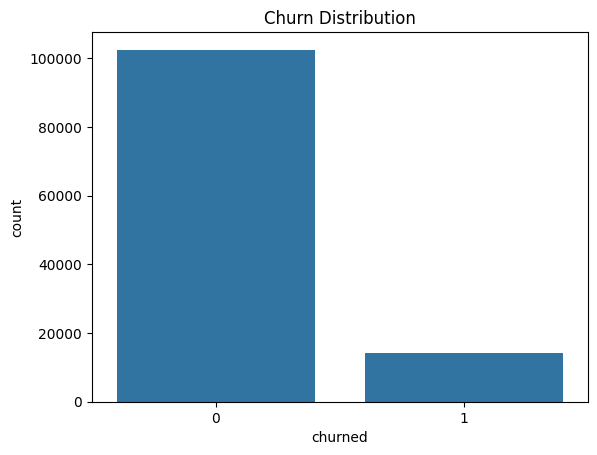

In [19]:
# Churn Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churned', data=df)
churn_rate = df['churned'].value_counts(normalize=True)
plt.title("Churn Distribution")

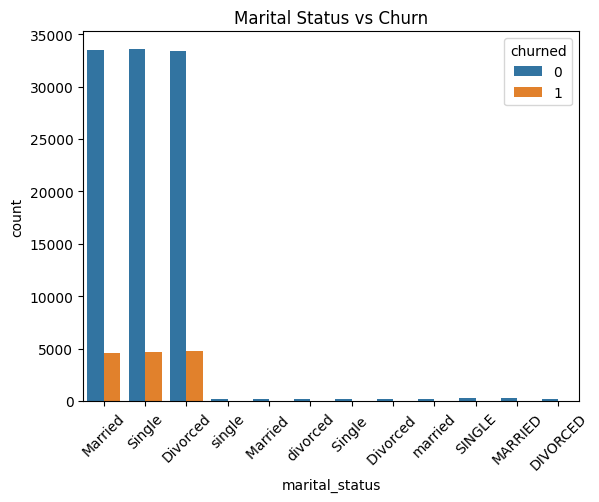

In [24]:
sns.countplot(x='marital_status', hue='churned', data=df)
plt.title("Marital Status vs Churn")
plt.xticks(rotation=45)
plt.show()

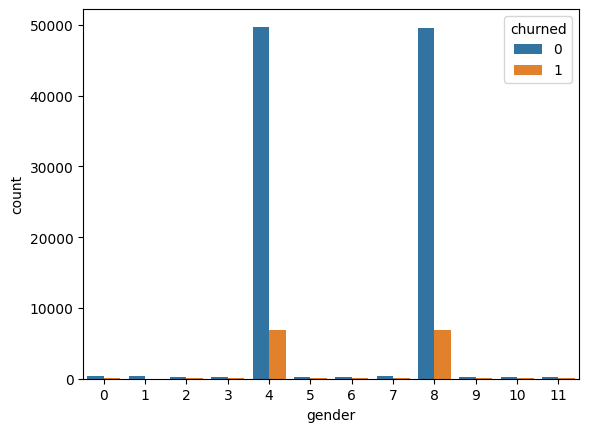

In [29]:
# Churn by Gender, Segment, or Occupation

sns.countplot(x='gender', hue='churned', data=df)
plt.show()  # Add plt.show() to display the gender plot
segment_cols = [col for col in df.columns if 'segment_' in col]

for col in segment_cols:
    sns.countplot(x=col, hue='churned', data=df)
    plt.title(f"Churn by {col}")
    plt.show()

<Axes: xlabel='credit_score', ylabel='Count'>

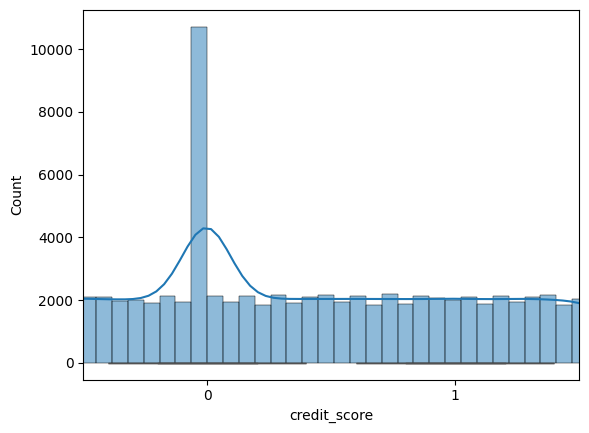

In [30]:
# Numerical Feature Distributions

sns.histplot(df['credit_score'], kde=True)
sns.boxplot(x='churned', y='outstanding_debt', data=df)

In [31]:
# Re-running necessary cells to define df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

csv_url = "https://raw.githubusercontent.com/SusheniUmayangana/Customer_churn/main/data/botswana_bank_customer_churn.csv"
# Specify dtypes to avoid the DtypeWarning
dtype_spec = {'RowNumber': str, 'churned': str, 'complaints_count': str}
df = pd.read_csv(csv_url, dtype=dtype_spec)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')   #clean column names
df.drop(['churn_reason', 'churn_date'], axis=1, inplace=True)   # Drop Irrelevant / High-Null Columns
df.dropna(subset=['customer_id', 'rownumber'], inplace=True)   # Handle Missing Values

# Fill categorical
cat_cols = ['gender', 'marital_status', 'dependents', 'occupation', 'education',
            'address', 'phone', 'segment', 'preferred_contact', 'credit_history_years',
            'churned', 'products_count', 'complaints_count']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical
num_cols = ['credit_score', 'outstanding_debt', 'income', 'balance', 'tenure_years']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric
    df[col] = df[col].fillna(df[col].median())

df.drop_duplicates(inplace=True)    # Remove duplicates

# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['churned'] = le.fit_transform(df['churned'].astype(str))

# One-hot encode multi-class
df = pd.get_dummies(df, columns=['occupation', 'education', 'segment', 'preferred_contact'], drop_first=True)

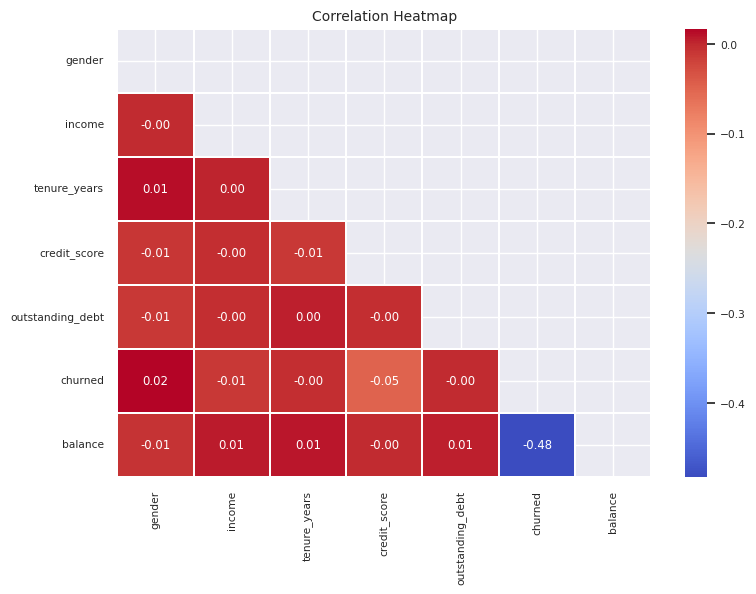

In [32]:
# Step 1: Select numeric columns and clean them
num_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[num_cols].copy()

# Step 2: Coerce errors and fill NaNs with column median
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.fillna(df_numeric.median())

# Step 3: Optional downsampling for performance
df_sampled = df_numeric.sample(n=10000, random_state=42)

# Step 4: Compute correlation matrix
corr = df_sampled.corr()

# Step 5: Optional filtering to highlight stronger relationships
# corr = corr[(corr > 0.3) | (corr < -0.3)]

# Step 6: Create upper triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 7: Plot heatmap
sns.set(font_scale=0.7)  # adjust font size for readability
plt.figure(figsize=(8, 6))  # adjust figure size
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.3)

plt.title("Correlation Heatmap", fontsize=10)
plt.tight_layout()
plt.show()

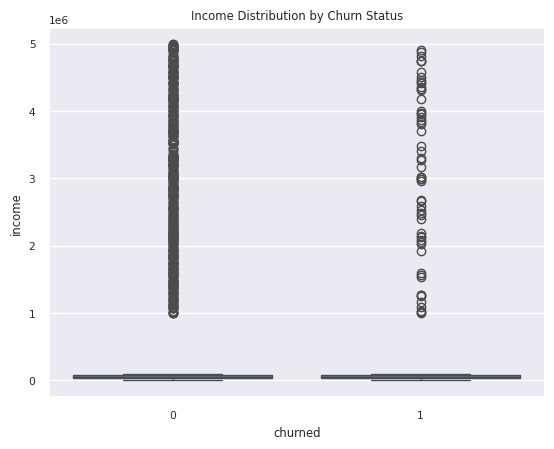

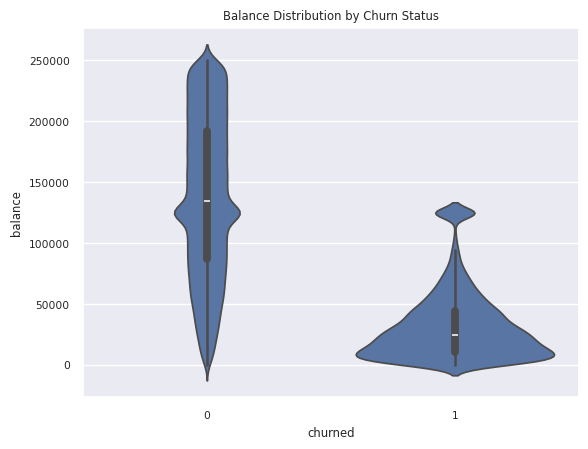

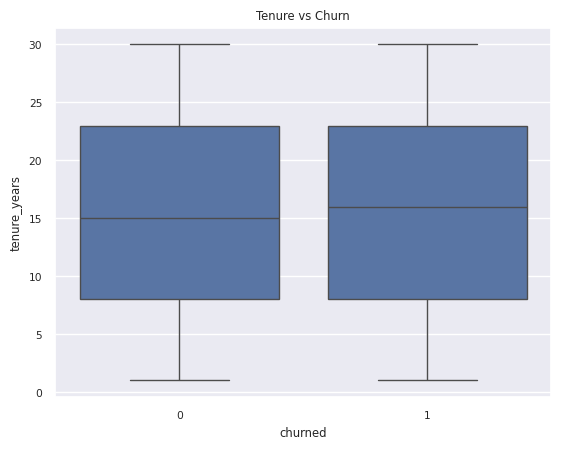

In [33]:
# Numerical Features vs. Churn

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Income vs Churn
sns.boxplot(x='churned', y='income', data=df)
plt.title("Income Distribution by Churn Status")
plt.show()

# Violin plot: Balance vs Churn
sns.violinplot(x='churned', y='balance', data=df)
plt.title("Balance Distribution by Churn Status")
plt.show()

# Boxplot: Tenure vs Churn
sns.boxplot(x='churned', y='tenure_years', data=df)
plt.title("Tenure vs Churn")
plt.show()

## 🔍 EDA Summary: Key Insights

- **Churn Rate**: Approximately **12.2%** of customers have churned, indicating **class imbalance** which should be considered in model design.
- **Numerical Trends**:
  - Churned customers tend to have **lower income** and **shorter tenure**, as shown in the boxplots.
  - **Balance** shows a wider spread among churned customers, as seen in the violin plot.
- **Categorical Patterns**:
  - The plots show potential differences in churn rate based on **marital status**, **gender**, and potentially **segments** and **occupations** (although specific plots for segments and occupations were not shown, the one-hot encoding suggests these are being considered).
  - **Preferred contact method** may also correlate with churn behavior based on the one-hot encoding.
- **Feature Interactions**:
  - (Based on the correlation heatmap and individual plots, specific feature interactions leading to churn are not explicitly highlighted in the current visualizations. This section can be elaborated after further analysis.)
- **Correlation Highlights**:
  - The correlation heatmap shows a **strong negative correlation between churned and balance** (-0.48).
  - Weak correlations are observed between other numerical features and churn.

These insights will guide feature selection and model design in the next phase.